# 示例：获取轴承的原始信号

In [1]:
from rulframework.data.FeatureExtractor import FeatureExtractor
from rulframework.data.loader.bearing.XJTULoader import XJTULoader
from rulframework.data.processor.RMSProcessor import RMSProcessor
from rulframework.data.stage.BearingStageCalculator import BearingStageCalculator
from rulframework.data.stage.eol.NinetyThreePercentRMSEoLCalculator import NinetyThreePercentRMSEoLCalculator
from rulframework.data.stage.fpt.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from rulframework.util.Plotter import Plotter

## 1.使用西交大轴承数据加载器

In [2]:
data_loader = XJTULoader('D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets')

DEBUG - 21:43:33 >> 
<< Root directory of dataset: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets
	Bearing1_1, location: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_1
	Bearing1_2, location: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_2
	Bearing1_3, location: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_3
	Bearing1_4, location: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_4
	Bearing1_5, location: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_5
	Bearing2_1, location: D:\桌面\数字孪生\剩余寿命预测\数据集\XJTU-SY_Bearing_Datasets\Data\XJTU-SY_Bearing_Datasets\XJTU-SY_Bearing_Datase

### 获取轴承1_3原始振动信号并输出

INFO - 21:43:44 >> Loading data entity: Bearing1_3
INFO - 21:44:04 >> Successfully loaded data entity: Bearing1_3


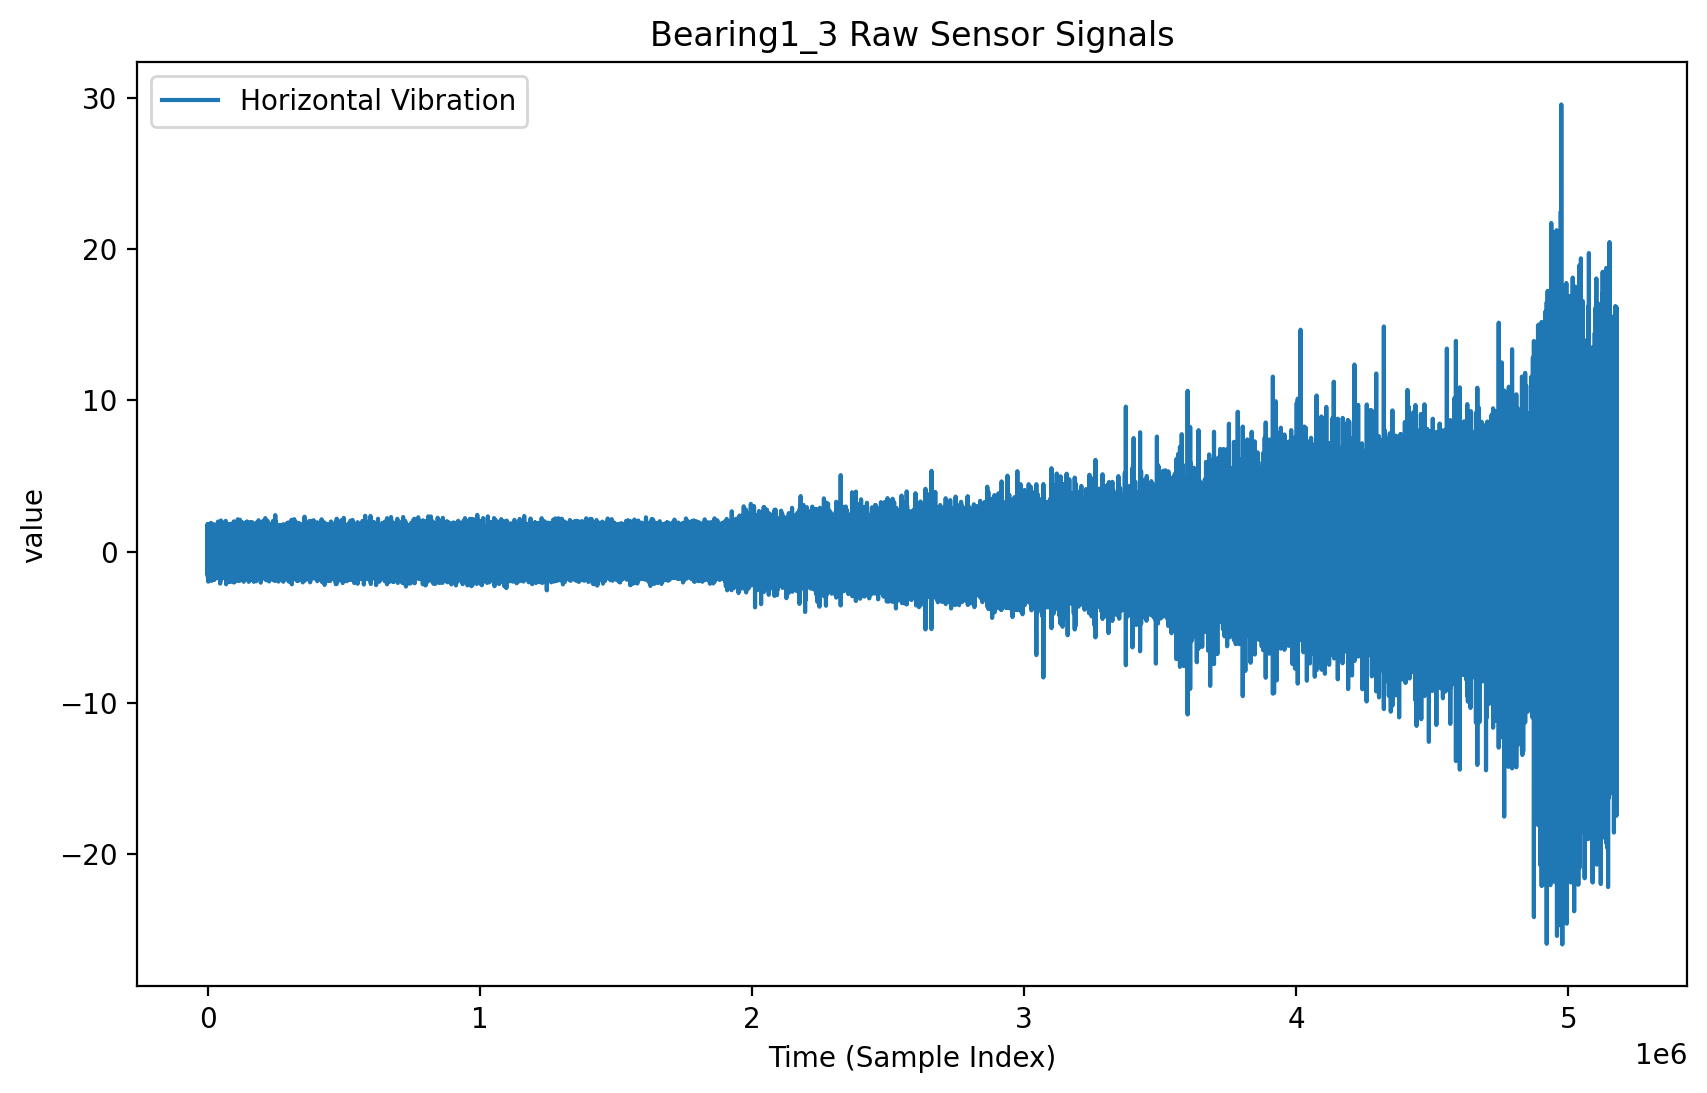

'Bearing1_3 Raw Sensor Signals'

In [3]:
bearing = data_loader("Bearing1_3", 'Horizontal Vibration')
Plotter.raw(bearing)

### 获取退化特征（这里使用RMS）

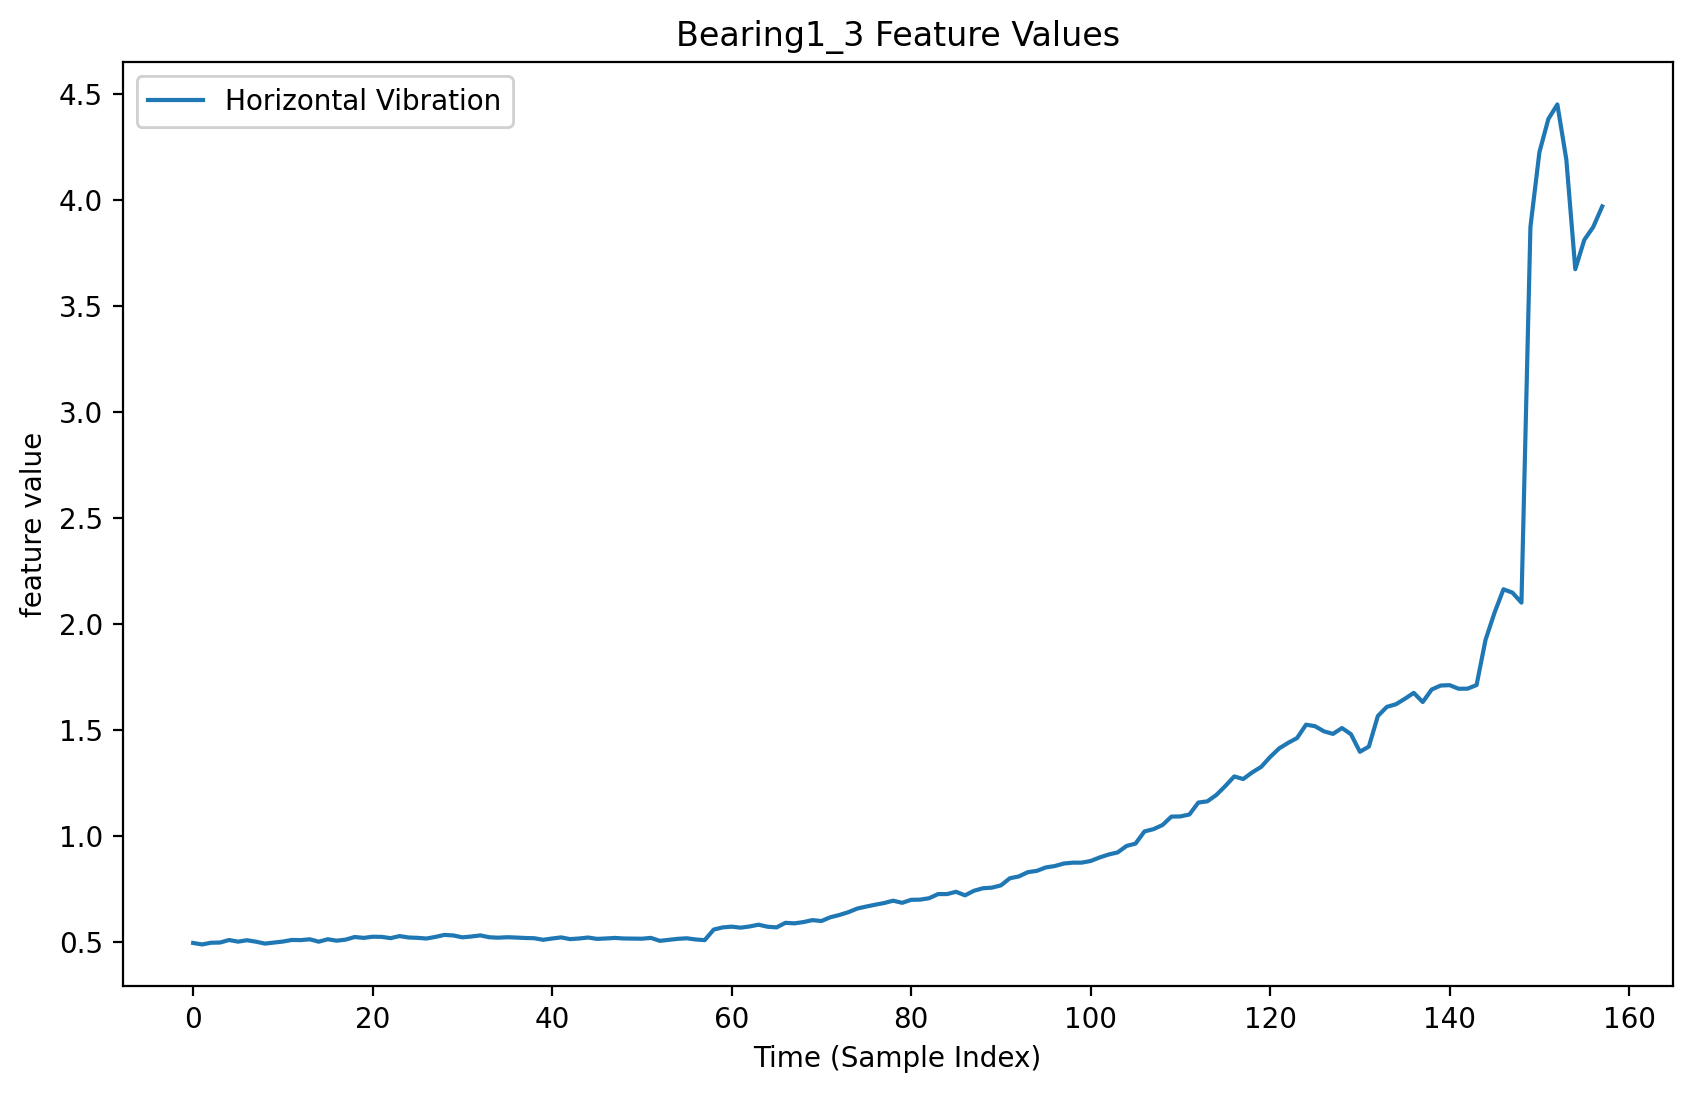

'Bearing1_3 Feature Values'

In [4]:
feature_extractor = FeatureExtractor(RMSProcessor(data_loader.continuum))
feature_extractor(bearing)
Plotter.feature(bearing)

### 划分轴承的退化阶段及失效阈值
- 3σ原则计算FPT

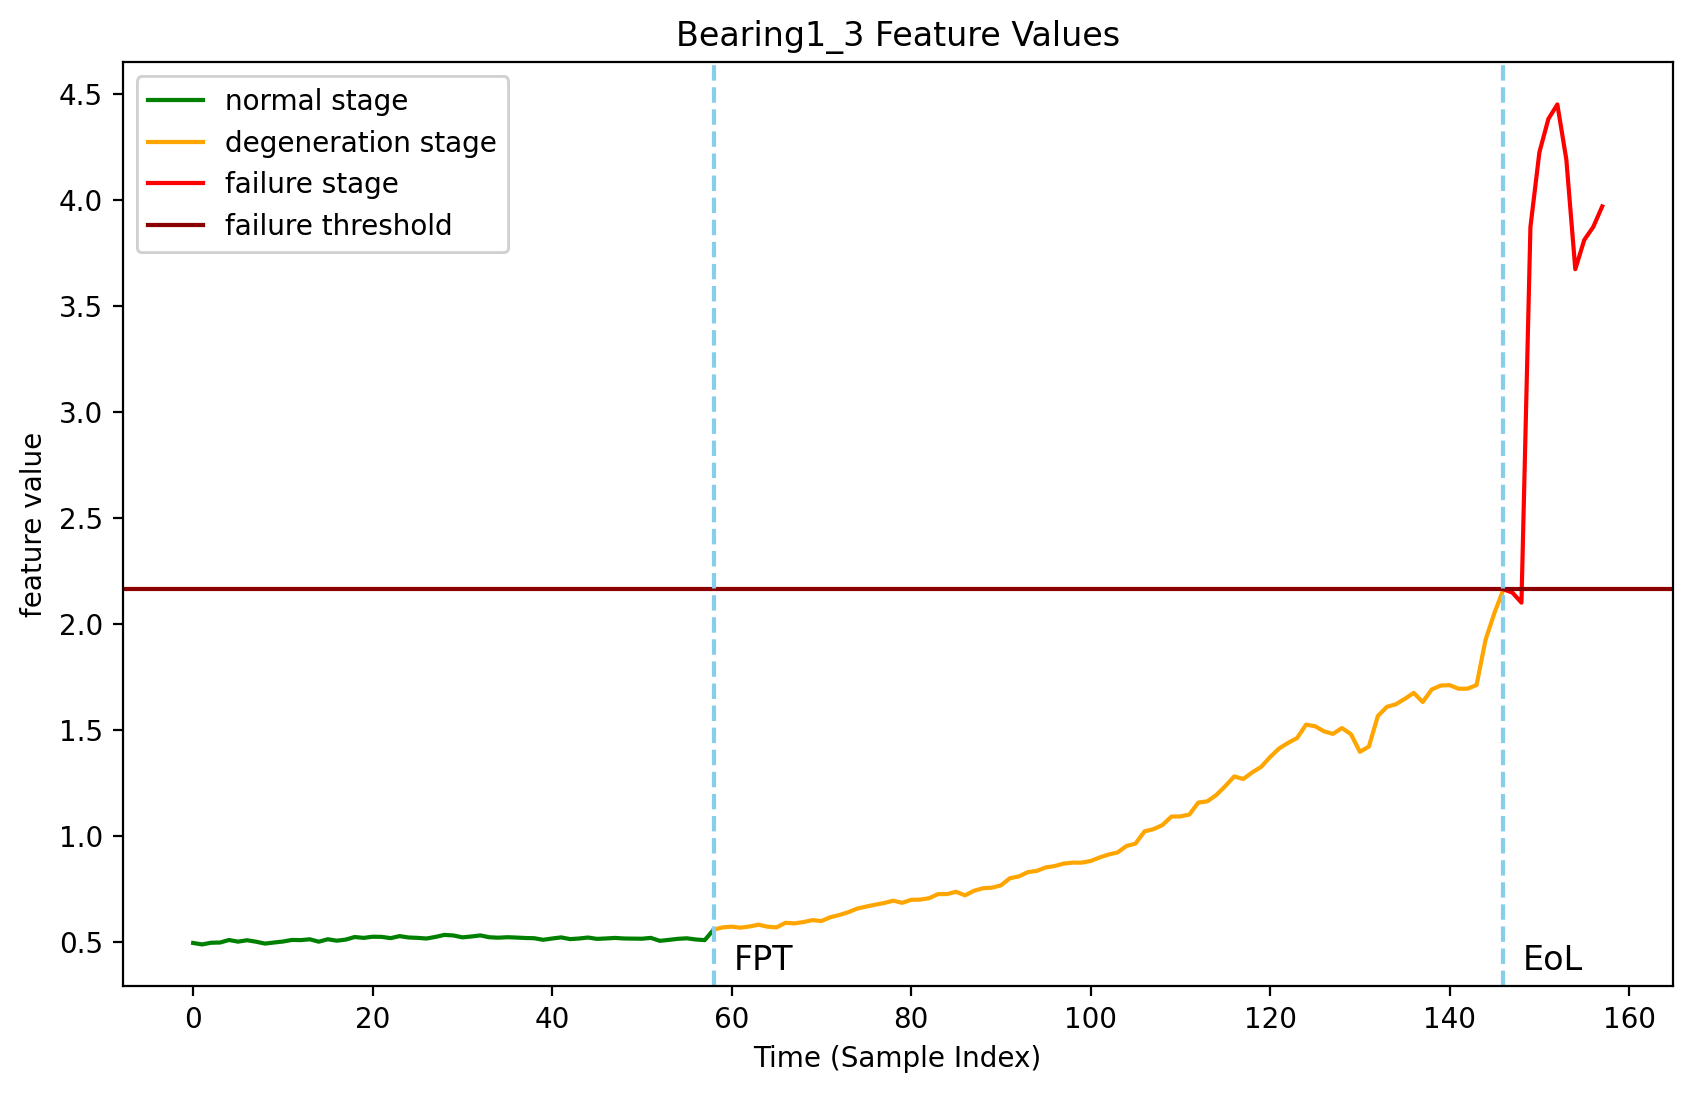

'Bearing1_3 Feature Values'

In [5]:
fpt_calculator = ThreeSigmaFPTCalculator()
eol_calculator = NinetyThreePercentRMSEoLCalculator()
stage_calculator = BearingStageCalculator(fpt_calculator, eol_calculator, data_loader.continuum)
stage_calculator(bearing)

Plotter.feature(bearing)